In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Read in random sampling results
da100 = pd.read_csv('../random_sampling/da100.csv')
da1k = pd.read_csv('../random_sampling/da1000.csv')
da10k = pd.read_csv('../random_sampling/da10000.csv')

dc100 = pd.read_csv('../random_sampling/dc100.csv')
dc1k = pd.read_csv('../random_sampling/dc1000.csv')
dc10k = pd.read_csv('../random_sampling/dc10000.csv')

nc100 = pd.read_csv('../random_sampling/nc100.csv')
nc1k = pd.read_csv('../random_sampling/nc1000.csv')
nc10k = pd.read_csv('../random_sampling/nc10000.csv')

ur100 = pd.read_csv('../random_sampling/ur100.csv')
ur1k = pd.read_csv('../random_sampling/ur1000.csv')
ur10k = pd.read_csv('../random_sampling/ur10000.csv')

In [3]:
#Read in grid search results
grid_search_timings = pd.DataFrame({'circuit':['da', 'dc','ur', 'nc'], 'time':[803, 921, 842, 885]})
gs_losses_dc = pd.read_csv('../6d_loss_landscape/dc_landscape_sundials.csv')
gs_losses_nc = pd.read_csv('../6d_loss_landscape/nc_landscape_sundials.csv')
gs_losses_da = pd.read_csv('../6d_loss_landscape/da_landscape_sundials.csv')
gs_losses_ur = pd.read_csv('../6d_loss_landscape/ur_landscape_sundials.csv')

In [4]:
#Read in gradient descent results
gd = pd.read_csv('../initialization_experiments/100trials_4circuits.csv')

In [5]:
#Combine all into best loss/computational time dataframe
combined = pd.DataFrame(columns=['Method', 'Circuit', 'Computational Time', 'Best Loss'])

def circuit_converter(circuit):
    if circuit == 'da': circuit_name = 'Downstream Activation'
    elif circuit == 'nc': circuit_name = 'No Control'
    elif circuit == 'dc': circuit_name = 'Dual Control'
    elif circuit == 'ur': circuit_name = 'Upstream Repression'
    return circuit_name

#Random sampling data processing
for df in [da100, da1k, da10k, dc100, dc1k, dc10k, nc100, nc1k, nc10k, ur100, ur1k, ur10k]:
    best_loss = df.loss.min()
    time = df.time[0]
    if str(df.num_samples[0]) == '100':
        method = '100 Random'
    elif str(df.num_samples[0]) == '1000':
        method = '1k Random'
    if str(df.num_samples[0]) == '10000':
        method = '10k Random'
    circuit = circuit_converter(df.circuit[0])
    row = pd.DataFrame({'Method': [method], 'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss]})
    combined = pd.concat([combined, row])

#Gradient descent data processing
for i in range(100):
    gd_single = gd.loc[gd.initialization == i]
    for c in ['nc','dc','da','ur']:
        df = gd_single.loc[gd_single.circuit == c]
        best_loss = df.loss.min()
        time = df.time.min()
        method = 'Gradient Descent'
        circuit = circuit_converter(c)
        row = pd.DataFrame({'Method': [method], 'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss]})
        combined = pd.concat([combined, row])


#Grid search data processing
for c in ['nc','dc','da','ur']:
    if c == 'nc': df = gs_losses_nc
    elif c == 'dc': df = gs_losses_dc
    elif c == 'da': df = gs_losses_da
    elif c == 'ur': df = gs_losses_ur
    best_loss = df.loss.min()
    time = grid_search_timings.loc[grid_search_timings.circuit == c].reset_index(drop=True).iloc[0].time
    method = 'Grid Search'
    circuit = circuit_converter(c)

    row = pd.DataFrame({'Method': [method], 'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss]})
    combined = pd.concat([combined, row])
    
combined.head()

,Method,Circuit,Computational Time,Best Loss
0,100 Random,Downstream Activation,0.663827,0.077568
0,1k Random,Downstream Activation,6.687740,0.066686
0,10k Random,Downstream Activation,68.817062,0.062072
0,100 Random,Dual Control,0.768979,0.066274
0,1k Random,Dual Control,7.912874,0.065841


Text(0, 0.5, 'Computational Time')

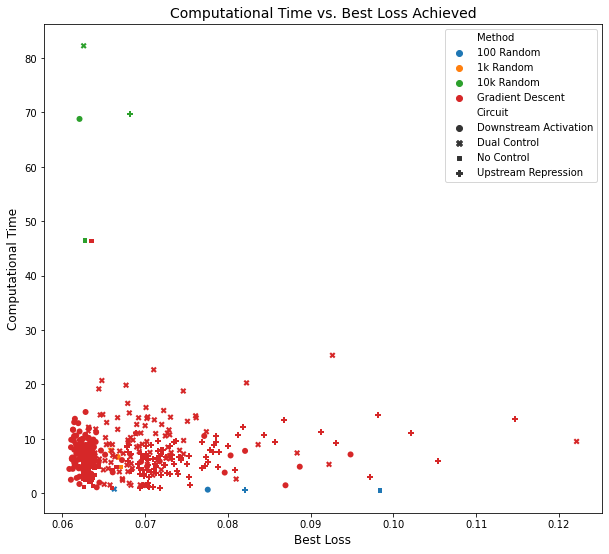

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(10, 9))
endpoint = 'Computational Time vs. Best Loss Achieved'
ax = axs
# for method in ['100 Random Samples', '1000 Random Samples', '10000 Random Samples', 'Gradient Descent', 'Grid Search']:
#     for circuit in ['Downstream Activation', 'Dual Control', 'Upstream Repression', 'No Control']
#         df = combined.loc[combined['Method'] == method].loc[combined['Circuit'] == circuit]
#         plt.plot(df.)
plot_data = combined.loc[combined['Method'] != 'Grid Search']
sns.scatterplot(x="Best Loss", y="Computational Time",
                hue="Method", style="Circuit",
                sizes=(1, 8), linewidth=0,
                data=plot_data, ax=ax)

ax.legend()
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Best Loss', fontsize=12)
ax.set_ylabel('Computational Time', fontsize=12)

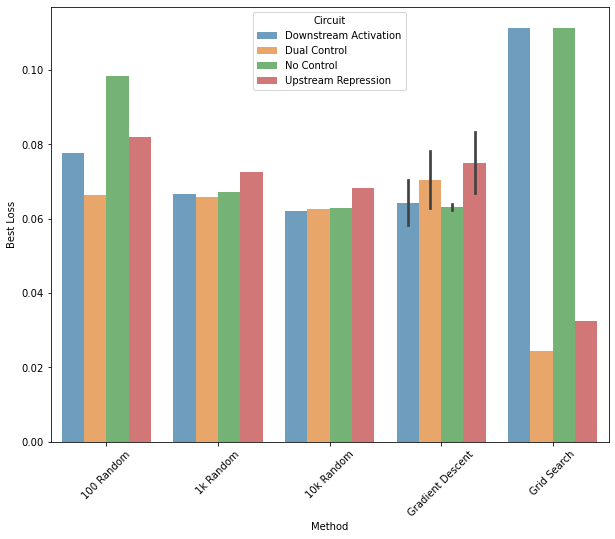

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
endpoint = 'Best Loss Achieved by Method and Circuit'
ax = axs
g = sns.barplot(
    data=combined,
    x="Method", y="Best Loss", hue="Circuit",
    ci="sd", alpha=0.7)

plt.xticks(rotation=45)
fig.savefig('bestlossfig.png')

(array([0, 1, 2]),
 [Text(0, 0, '100 Random'),
  Text(1, 0, '1k Random'),
  Text(2, 0, 'Gradient Descent')])

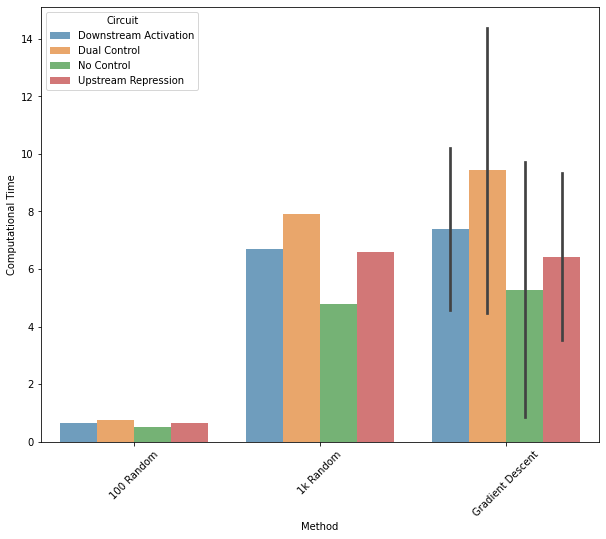

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
plot_data = plot_data.loc[plot_data['Method'] != '10k Random']

endpoint = 'Computation Time Required by Method and Circuit'
ax = axs
g = sns.barplot(
    data=plot_data,
    x="Method", y="Computational Time", hue="Circuit",
    ci="sd", alpha=0.7)

plt.xticks(rotation=45)
#fig.savefig('comptime_figure.png')

In [9]:
#Compute low losses for all grid search landscapes
tolerance = 0.04
gs_nc_ll = gs_losses_nc.loc[gs_losses_nc.loss < gs_losses_nc.loss.min() + tolerance]
gs_dc_ll = gs_losses_dc.loc[gs_losses_dc.loss < gs_losses_dc.loss.min() + tolerance]
gs_da_ll = gs_losses_da.loc[gs_losses_da.loss < gs_losses_da.loss.min() + tolerance]
gs_ur_ll = gs_losses_ur.loc[gs_losses_ur.loss < gs_losses_ur.loss.min() + tolerance]

In [10]:

loss_auc_df = pd.DataFrame(columns=['Circuit', 'Computational Time', 'Best Loss', 'Loss AUC'])


#Gradient descent data processing
for i in range(100):
    gd_single = gd.loc[gd.initialization == i]
    for c in ['nc','dc','da','ur']:
        df = gd_single.loc[gd_single.circuit == c]
        best_loss = df.loss.min()
        loss_auc = df.loss_auc.min()
        time = df.time.min()
        circuit = circuit_converter(c)
        row = pd.DataFrame({'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[best_loss], 'Loss AUC':[loss_auc]})
        loss_auc_df = pd.concat([loss_auc_df, row])



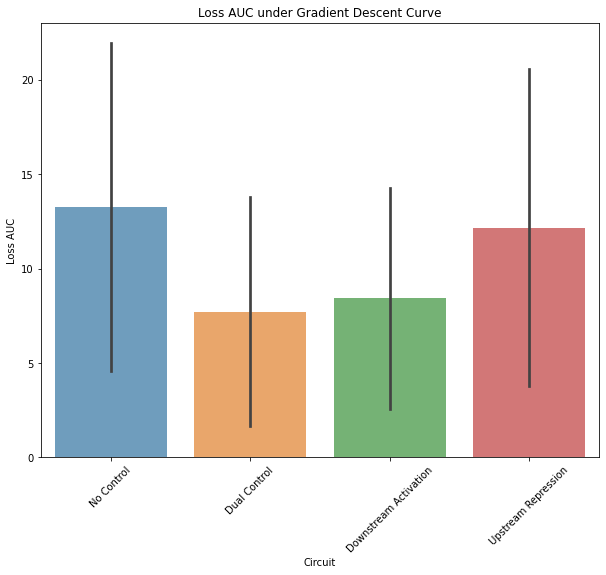

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
endpoint = 'Loss AUC under Gradient Descent Curve'
ax = axs
g = sns.barplot(
    data=loss_auc_df,
    x="Circuit", y="Loss AUC",
    ci="sd", alpha=0.7)
plt.title(endpoint)
plt.xticks(rotation=45)
fig.savefig('loss_auc.png')

In [12]:
#Find solutions in DA space to sample around
low_loss = gd.loc[gd.circuit == 'da'].loc[gd.loss < 0.1]

In [13]:
low_loss.groupby('initialization').count()['loss']

initialization
1       5
2       5
3       3
4       6
5       4
       ..
96     13
97      9
98      3
99     13
100     9
Name: loss, Length: 100, dtype: int64

In [14]:


#Run TSNE and PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

low_loss = gd.loc[gd.loss < 0.1]

features = ['n1_trace', 'n2_trace', 'theta1_trace', 'theta2_trace', 'k1_trace', 'k2_trace', 'loss']

x = low_loss.loc[:, features].values

#Normalize features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, low_loss[['loss', 'circuit']]], axis = 1)



tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
low_loss['tsne1'] = tsne_results[:,0]
low_loss['tsne2'] = tsne_results[:,1]



C:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2426 samples in 0.003s...
[t-SNE] Computed neighbors for 2426 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2426
[t-SNE] Computed conditional probabilities for sample 2000 / 2426
[t-SNE] Computed conditional probabilities for sample 2426 / 2426
[t-SNE] Mean sigma: 0.798665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.566673
[t-SNE] KL divergence after 300 iterations: 1.089597


C:\Users\CHARLO~1\AppData\Local\Temp/ipykernel_25340/501528679.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_loss['tsne1'] = tsne_results[:,0]
C:\Users\CHARLO~1\AppData\Local\Temp/ipykernel_25340/501528679.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_loss['tsne2'] = tsne_results[:,1]


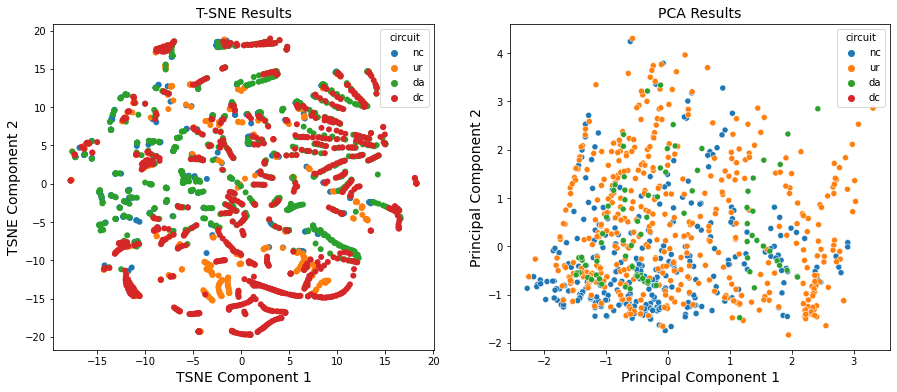

In [15]:
import matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'T-SNE Results'
ax = axs[0]
#sns.scatterplot(x='pc1', y='pc2', data = finalDf, hue='loss', ax=ax)
sns.scatterplot(x="tsne1", y="tsne2",
                hue="circuit",
                sizes=(1, 8), linewidth=0,
                data=low_loss, ax=ax)
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('TSNE Component 1', fontsize=14)
ax.set_ylabel('TSNE Component 2', fontsize=14)


endpoint = 'PCA Results'
ax = axs[1]
sns.scatterplot(x='pc1', y='pc2', data = finalDf, hue='circuit', ax=ax)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
fig.savefig('TSNE_PCA_GD_lowloss.png')

In [20]:


#Compute SD between initializations for GD final values
#final_vals = pd.DataFrame(columns=['Circuit', 'Computational Time', 'Best Loss', 'Loss AUC', 'k1', 'k2', 'n1', 'n2', 'theta1', 'theta2'])
c = 'ur'
circuit_df = gd.loc[gd.circuit ==c]
#Gradient descent data processing
for i in range(1, 100):
    df = circuit_df.loc[circuit_df.initialization == i]
    df = df.loc[df.loss == df.loss.min()].reset_index(drop=True)
    index = len(df)-1
    d = df.iloc[index]
    k1 = d.k1_trace
    k2 = d.k2_trace
    n1 = d.n1_trace
    n2 = d.n2_trace
    theta1 = d.theta1_trace
    theta2 = d.theta2_trace
    loss_auc = d.loss_auc
    time = d.time
    circuit = circuit_converter(c)
    row = pd.DataFrame({'Circuit': [circuit], 'Computational Time':[time], 'Best Loss':[d.loss], 'Loss AUC':[loss_auc], 'k1':[k1], 'k2':[k2], 'n1':[n1], 'n2':[n2], 'theta1':[theta1], 'theta2':[theta2]})
    final_vals = pd.concat([final_vals, row])
final_vals



,Circuit,Computational Time,Best Loss,Loss AUC,k1,k2,n1,n2,theta1,theta2
0,No Control,7.752672,0.063505,35.432109,0.000040,0.000029,1.412349,3.386546,8.775744,5.577137
0,No Control,4.901357,0.062705,10.315270,0.000049,0.000027,3.467383,3.962284,4.921574,4.540059
0,No Control,5.964673,0.063248,17.009850,0.000039,0.000027,3.513506,2.085105,7.955038,0.991892
0,No Control,4.031624,0.062869,7.046419,0.000047,0.000022,2.119658,3.279186,6.605469,6.970767
0,No Control,5.270137,0.062502,12.428691,0.000045,0.000024,2.343655,1.630533,3.226871,4.747996
...,...,...,...,...,...,...,...,...,...,...
0,Upstream Repression,1.087724,0.071003,0.355013,0.000827,0.000016,1.025106,1.143321,4.148274,6.651605
0,Upstream Repression,9.460729,0.076922,20.601302,0.000366,0.000045,1.732183,2.582413,1.551183,2.891136
0,Upstream Repression,12.110024,0.081866,12.887249,0.000958,0.000050,2.050174,1.721657,0.811398,5.056510
0,Upstream Repression,7.925452,0.071949,26.705022,0.000331,0.000025,3.251812,1.609089,7.715127,0.305482


In [21]:
final_vals.groupby('Circuit').mean()

,Computational Time,Best Loss,Loss AUC,k1,k2,n1,n2,theta1,theta2
Circuit,,,,,,,,,
Downstream Activation,7.382413,0.064321,8.424938,0.000046,0.000097,2.420961,2.450497,4.746951,5.265881
Dual Control,9.423776,0.070498,7.722384,0.000428,0.000102,2.221092,2.503532,4.751001,5.268343
No Control,5.279409,0.063106,13.261398,0.000046,0.000026,2.407862,2.375885,4.746974,5.266680
Upstream Repression,6.428373,0.075018,12.154373,0.000440,0.000034,2.294268,2.376703,4.750893,5.265477


In [22]:
final_vals.groupby('Circuit').std()

,Computational Time,Best Loss,Loss AUC,k1,k2,n1,n2,theta1,theta2
Circuit,,,,,,,,,
Downstream Activation,2.828026,0.005995,5.880141,0.000004,0.000173,0.873998,0.900448,3.043274,2.805780
Dual Control,4.986593,0.007605,6.092619,0.000333,0.000158,0.865121,0.902252,3.035962,2.803298
No Control,4.442944,0.000722,8.704903,0.000004,0.000004,0.867641,0.939816,3.041535,2.805979
Upstream Repression,2.917735,0.008276,8.425025,0.000278,0.000016,0.870289,0.920376,3.038901,2.804912


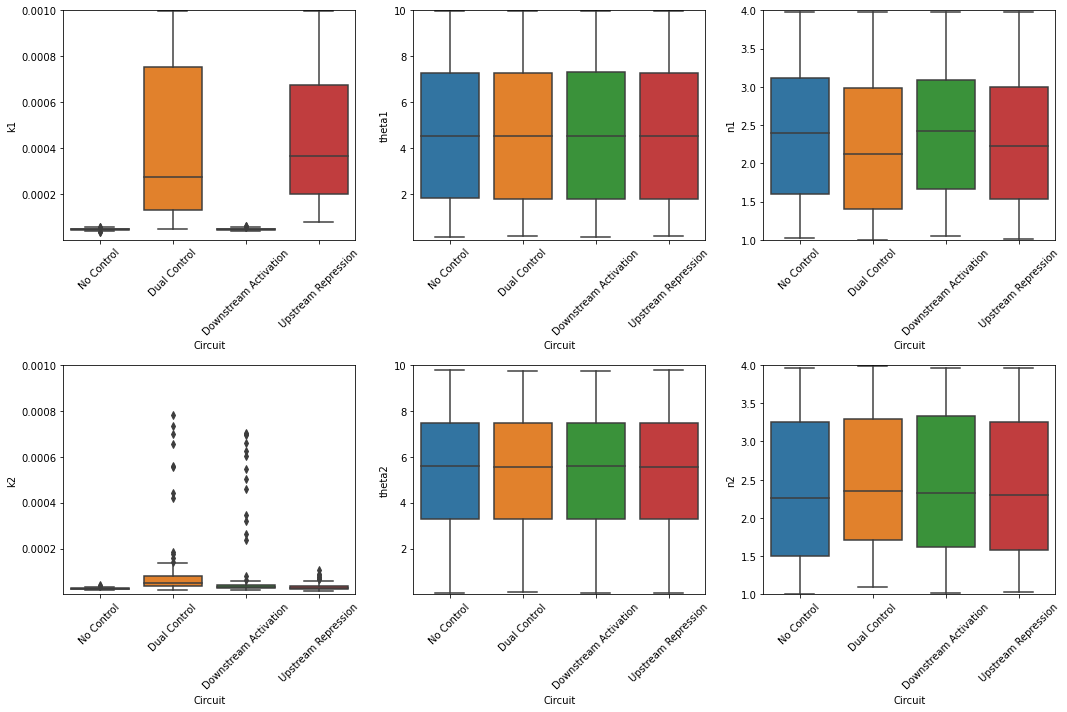

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

ax = axs[0][0]
sns.boxplot(x="Circuit", y="k1",
            data=final_vals, ax=ax)
ax.tick_params('x', labelrotation=45)
ax.set_ylim([1E-7, 1E-3])

ax = axs[0][1]
sns.boxplot(x="Circuit", y="theta1",
            data=final_vals, ax=ax)
ax.tick_params('x', labelrotation=45)
ax.set_ylim([0.001, 10])

ax = axs[0][2]
sns.boxplot(x="Circuit", y="n1",
            data=final_vals, ax=ax)
ax.tick_params('x', labelrotation=45)
ax.set_ylim([1, 4])

ax = axs[1][0]
sns.boxplot(x="Circuit", y="k2",
            data=final_vals, ax=ax)
ax.tick_params('x', labelrotation=45)
ax.set_ylim([1E-7, 1E-3])

ax = axs[1][1]
sns.boxplot(x="Circuit", y="theta2",
            data=final_vals, ax=ax)
ax.tick_params('x', labelrotation=45)
ax.set_ylim([0.001, 10])

ax = axs[1][2]
sns.boxplot(x="Circuit", y="n2",
            data=final_vals, ax=ax)
ax.tick_params('x', labelrotation=45)
ax.set_ylim([1, 4])
plt.tight_layout()
fig.savefig('boxplot_finalvalues_gd.png')



C:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 396 samples in 0.000s...
[t-SNE] Computed neighbors for 396 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 396 / 396
[t-SNE] Mean sigma: 1.057773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.460327
[t-SNE] KL divergence after 300 iterations: 0.883247


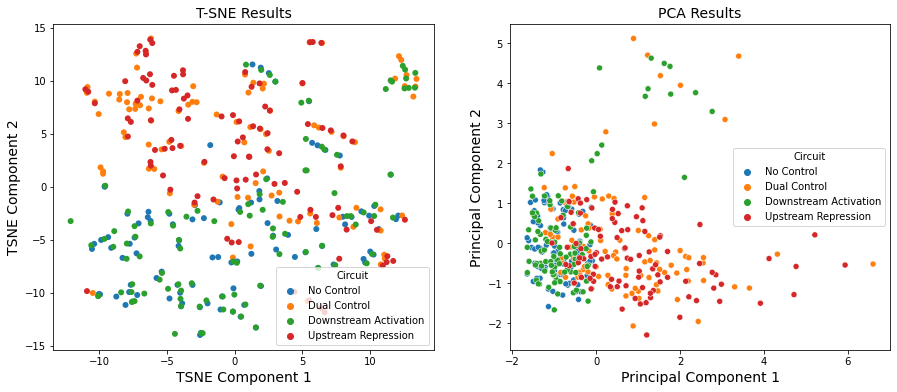

In [24]:


low_loss = gd.loc[gd.loss < 0.1]

features = ['n1', 'n2', 'theta1', 'theta2', 'k1', 'k2', 'Best Loss']

x = final_vals.loc[:, features].values

#Normalize features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
final_vals['pc1'] = principalComponents[:,0]
final_vals['pc2'] = principalComponents[:,1]


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
final_vals['tsne1'] = tsne_results[:,0]
final_vals['tsne2'] = tsne_results[:,1]

import matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'T-SNE Results'
ax = axs[0]
#sns.scatterplot(x='pc1', y='pc2', data = finalDf, hue='loss', ax=ax)
sns.scatterplot(x="tsne1", y="tsne2",
                hue="Circuit",
                sizes=(1, 8), linewidth=0,
                data=final_vals, ax=ax)
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('TSNE Component 1', fontsize=14)
ax.set_ylabel('TSNE Component 2', fontsize=14)


endpoint = 'PCA Results'
ax = axs[1]
sns.scatterplot(x='pc1', y='pc2', data = final_vals, hue='Circuit', ax=ax)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
fig.savefig('TSNE_PCA_GD_finalvals.png')



In [25]:
sample = final_vals.loc[final_vals.Circuit == 'Downstream Activation']
sample.to_csv('Da_bestloss_samples.csv')